<a href="https://colab.research.google.com/github/marreapato/Deep_Learning_Course/blob/main/all_labels_VLModel_Lucas_Rabelo_modelo_clip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificador zero-shot utilizando o prompt da categoria.


In [1]:
!pip install transformers

## Modelo CLIP

In [2]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [3]:

model.text_model.embeddings

CLIPTextEmbeddings(
  (token_embedding): Embedding(49408, 512)
  (position_embedding): Embedding(77, 512)
)

#Connect with Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
%cd /content/gdrive/MyDrive/Fundamentals_Deep_Learning

!ls




/content/gdrive/.shortcut-targets-by-id/1RQft65Bgd2d6TCEfL0c3FLA4gzbYIqmV/Fundamentals_Deep_Learning
 001_tensorflow.ipynb		     BANKEX.csv
 00_jupyterlab.ipynb		    'Cópia de 01_mnist.ipynb'
 01_mnist.ipynb			     data
 02_asl.ipynb			     GRU_B20
 03_asl_cnn.ipynb		     images
 04a_asl_augmentation.ipynb	     LSTM_B20
 04b_asl_predictions.ipynb	     mit_indoor_scene_dataset
 05a_doggy_door.ipynb		    'NN FeedForward - CIFAR - 10.ipynb'
 05b_presidential_doggy_door.ipynb   original
 06_headline_generator.ipynb	     outdir
 activities.csv			     RNN_multi.ipynb
 asl_model


In [6]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pathlib

data_dir = "/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/"
data_dir = pathlib.Path(data_dir)


train_dataset = list(data_dir.glob('train/*'))
test_dataset = list(data_dir.glob('test/*'))

In [7]:
train_dataset

[PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/ship'),
 PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/equine'),
 PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/deer'),
 PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/bird'),
 PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/plane'),
 PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/cat'),
 PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/car'),
 PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/dog'),
 PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/truck'),
 PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/frog')]

In [8]:
from pathlib import Path
# List to store (label, image, caption) tuples
labeled_images = []

# Loop through each folder and open each image
for folder_path in train_dataset:
    folder_path = Path(folder_path)

    # Extract label from folder name
    label = folder_path.stem

    # List all files in the folder
    image_files = folder_path.glob('*.*')

    # Loop through each image file
    for image_file in image_files:
        # Open the image
        image = Image.open(image_file)

        # Create a standard caption with the label at the end
        caption = f"Standard Caption Here - Label: {label}"

        # Append the (label, image, caption) tuple to the list
        labeled_images.append((label, image, caption))

In [9]:
# Extract images from the labeled_images tuple using a list comprehension
images_vector = [item[1] for item in labeled_images]

In [10]:
images_vector

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.Jpeg

In [11]:
# Extract images from the labeled_images tuple using a list comprehension
captions_vector = [item[2] for item in labeled_images]

In [12]:
images_vector[0:3]

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>]

In [13]:
import numpy as np
vetor_caption=np.array(captions_vector)
vetor_caption=np.unique(vetor_caption).tolist()

In [14]:
len(images_vector)

21134

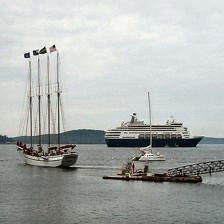

In [17]:
images_vector[9]

In [18]:
vetor_caption

['Standard Caption Here - Label: bird',
 'Standard Caption Here - Label: car',
 'Standard Caption Here - Label: cat',
 'Standard Caption Here - Label: deer',
 'Standard Caption Here - Label: dog',
 'Standard Caption Here - Label: equine',
 'Standard Caption Here - Label: frog',
 'Standard Caption Here - Label: plane',
 'Standard Caption Here - Label: ship',
 'Standard Caption Here - Label: truck']

In [15]:
inputs = processor(
    text=vetor_caption,
    images=images_vector[9],
    return_tensors="pt",
    padding=True
    )

In [16]:
inputs

{'input_ids': tensor([[49406,  5807, 11327,   763,   268,  9093,   281,  3329, 49407],
        [49406,  5807, 11327,   763,   268,  9093,   281,  1615, 49407],
        [49406,  5807, 11327,   763,   268,  9093,   281,  2368, 49407],
        [49406,  5807, 11327,   763,   268,  9093,   281,  8700, 49407],
        [49406,  5807, 11327,   763,   268,  9093,   281,  1929, 49407],
        [49406,  5807, 11327,   763,   268,  9093,   281, 33801, 49407],
        [49406,  5807, 11327,   763,   268,  9093,   281, 11438, 49407],
        [49406,  5807, 11327,   763,   268,  9093,   281,  5363, 49407],
        [49406,  5807, 11327,   763,   268,  9093,   281,  1158, 49407],
        [49406,  5807, 11327,   763,   268,  9093,   281,  4629, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1,

O modelo prevê 98% de probabilidade do texto 'Standard Caption Here - Label: ship' pertencer imagem do navio

In [19]:
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

probs

tensor([[3.4940e-03, 2.1811e-04, 2.4436e-04, 1.8601e-03, 4.7269e-04, 1.9408e-03,
         5.8403e-05, 2.0872e-03, 9.8956e-01, 6.0908e-05]],
       grad_fn=<SoftmaxBackward0>)

In [20]:
outputs

CLIPOutput(loss=None, logits_per_image=tensor([[19.9803, 17.2065, 17.3202, 19.3499, 17.9800, 19.3924, 15.8889, 19.4651,
         25.6265, 15.9309]], grad_fn=<TBackward0>), logits_per_text=tensor([[19.9803],
        [17.2065],
        [17.3202],
        [19.3499],
        [17.9800],
        [19.3924],
        [15.8889],
        [19.4651],
        [25.6265],
        [15.9309]], grad_fn=<MulBackward0>), text_embeds=tensor([[ 0.0276,  0.0116,  0.0223,  ..., -0.0438,  0.0097, -0.0284],
        [ 0.0090, -0.0030,  0.0138,  ..., -0.0172, -0.0057, -0.0017],
        [ 0.0178, -0.0089,  0.0077,  ..., -0.0427, -0.0157,  0.0021],
        ...,
        [ 0.0074,  0.0083,  0.0220,  ..., -0.0219,  0.0161, -0.0038],
        [ 0.0091, -0.0076,  0.0210,  ..., -0.0348,  0.0166, -0.0009],
        [ 0.0240,  0.0130,  0.0223,  ..., -0.0100,  0.0016, -0.0040]],
       grad_fn=<DivBackward0>), image_embeds=tensor([[ 3.0840e-02, -2.6595e-02, -1.6832e-02,  5.1329e-02, -2.1657e-03,
         -7.4381e-03, -2.7105e-

In [21]:
outputs.keys()


odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

# Features de Texto

In [22]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch32")

inputs = tokenizer(
    vetor_caption,
    padding=True,
    return_tensors="pt"
    )

In [23]:
inputs


{'input_ids': tensor([[49406,  5807, 11327,   763,   268,  9093,   281,  3329, 49407],
        [49406,  5807, 11327,   763,   268,  9093,   281,  1615, 49407],
        [49406,  5807, 11327,   763,   268,  9093,   281,  2368, 49407],
        [49406,  5807, 11327,   763,   268,  9093,   281,  8700, 49407],
        [49406,  5807, 11327,   763,   268,  9093,   281,  1929, 49407],
        [49406,  5807, 11327,   763,   268,  9093,   281, 33801, 49407],
        [49406,  5807, 11327,   763,   268,  9093,   281, 11438, 49407],
        [49406,  5807, 11327,   763,   268,  9093,   281,  5363, 49407],
        [49406,  5807, 11327,   763,   268,  9093,   281,  1158, 49407],
        [49406,  5807, 11327,   763,   268,  9093,   281,  4629, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1,

In [24]:
text_features = model.get_text_features(**inputs)
text_features.shape

torch.Size([10, 512])

# Features de Imagem

In [25]:
inputs = processor(images=images_vector[9], return_tensors="pt")
image_features = model.get_image_features(**inputs)
image_features.shape


torch.Size([1, 512])

In [26]:
inputs


{'pixel_values': tensor([[[[ 1.5070e+00,  1.5216e+00,  1.5362e+00,  ...,  1.5216e+00,
            1.5216e+00,  1.5216e+00],
          [ 1.5070e+00,  1.5070e+00,  1.5216e+00,  ...,  1.5216e+00,
            1.5216e+00,  1.5216e+00],
          [ 1.5070e+00,  1.4924e+00,  1.4924e+00,  ...,  1.5070e+00,
            1.5070e+00,  1.5070e+00],
          ...,
          [-3.7622e-01, -4.0541e-01, -4.2001e-01,  ..., -1.8644e-01,
           -1.2804e-01, -6.9648e-02],
          [-3.3242e-01, -3.1782e-01, -2.8862e-01,  ..., -1.1344e-01,
           -4.0451e-02,  3.2541e-02],
          [-2.0103e-01, -1.5724e-01, -1.2804e-01,  ..., -2.0103e-01,
           -1.7184e-01, -1.4264e-01]],

         [[ 1.6397e+00,  1.6547e+00,  1.6697e+00,  ...,  1.7297e+00,
            1.7297e+00,  1.7297e+00],
          [ 1.6397e+00,  1.6397e+00,  1.6547e+00,  ...,  1.7297e+00,
            1.7297e+00,  1.7297e+00],
          [ 1.6397e+00,  1.6247e+00,  1.6247e+00,  ...,  1.7147e+00,
            1.7147e+00,  1.7147e+00],
   